# Simple CNN Model for classification

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/kaggle/input/drone-and-not-drone/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn_histoy = cnn.fit(training_set, epochs = 25)

2024-09-28 07:42:30.247929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 07:42:30.247981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 07:42:30.249444: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 127 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/4 ━━━━━━━━━━━━━━━━━━━━ 1:49 36s/step - accuracy: 0.5312 - loss: 0.6972

I0000 00:00:1727509407.386530     436 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1727509407.405193     436 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5168 - loss: 2.4217
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6229 - loss: 1.0371
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.6954 - loss: 0.5935
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.7116 - loss: 0.5229
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.7450 - loss: 0.5269
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.8308 - loss: 0.4307
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.8046 - loss: 0.4235
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.8109 - loss: 0.4021
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.8507 - loss: 0.3505
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.8819 - loss: 0.3151
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.8725 - loss: 0.3081
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.8714 - loss: 0.2841
Ep

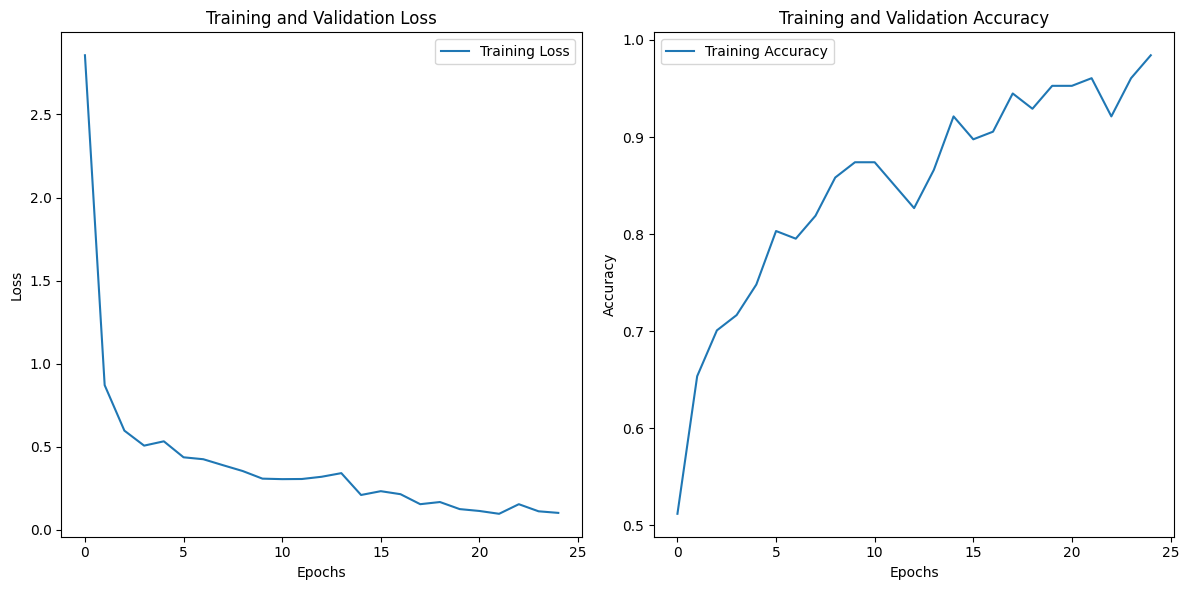

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_histoy.history['loss'], label='Training Loss')
if 'val_loss' in cnn_histoy.history:
    plt.plot(cnn_histoy.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_histoy.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in cnn_histoy.history:
    plt.plot(cnn_histoy.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("cnn_history.png")
plt.show()

In [4]:
import os, numpy as np
from tensorflow.keras.preprocessing import image

test_folder = "/kaggle/input/drone-and-not-drone/val/Drone/"

print(training_set.class_indices)

test_generator = train_datagen.flow_from_directory(
    '/kaggle/input/drone-and-not-drone/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

loss, accuracy = cnn.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')

{'Drone': 0, 'Not Drone': 1}
Found 11 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8182 - loss: 3.1260
Test accuracy: 0.8181818127632141


# Fine tuning ResNet50 Model for classification

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

resnet_base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_base.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet_base.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=resnet_base.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/drone-and-not-drone/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

resNet_history = model.fit(train_generator, epochs=25)

Found 127 images belonging to 2 classes.
Epoch 1/25
1/4 ━━━━━━━━━━━━━━━━━━━━ 2:09 43s/step - accuracy: 0.4688 - loss: 0.7317

W0000 00:00:1727510270.135543     437 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3/4 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.4993 - loss: 0.7354 

W0000 00:00:1727510279.291410     437 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.4917 - loss: 0.7386
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.5005 - loss: 0.7005
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 92ms/step - accuracy: 0.5409 - loss: 0.7168
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.6051 - loss: 0.6579
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.5767 - loss: 0.6705
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 87ms/step - accuracy: 0.5883 - loss: 0.6560
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 100ms/step - accuracy: 0.6633 - loss: 0.6499
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.5815 - loss: 0.6557
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.6845 - loss: 0.6429
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.5675 - loss: 0.6516
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 97ms/step - accuracy: 0.6898 - loss: 0.6344
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.6886 - loss: 0.6322
E

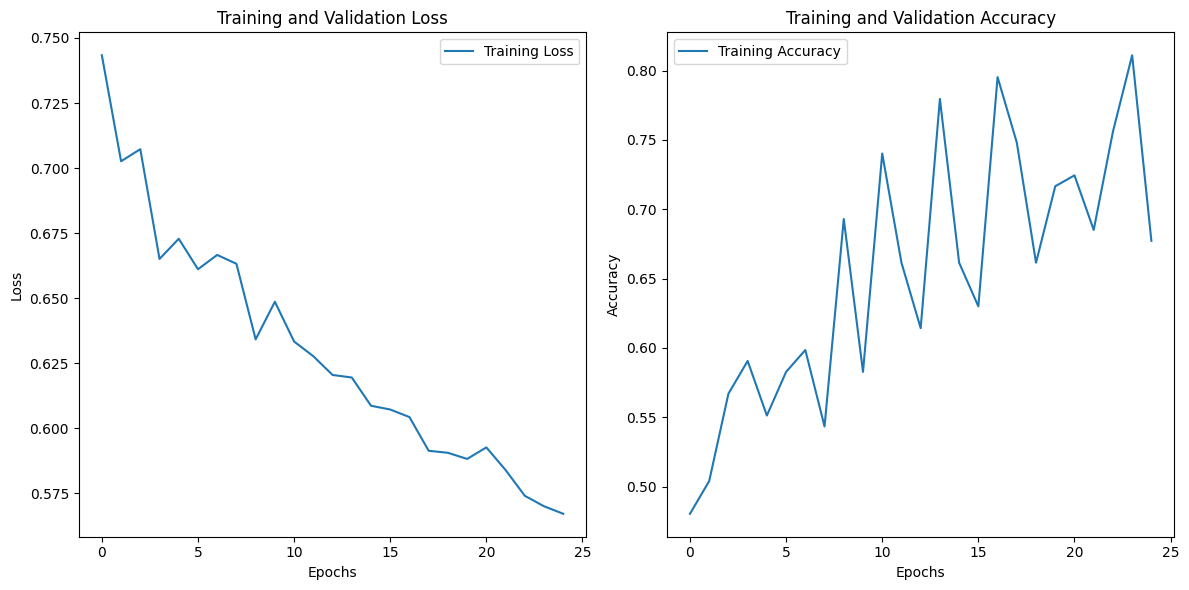

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(resNet_history.history['loss'], label='Training Loss')
if 'val_loss' in resNet_history.history:
    plt.plot(resNet_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resNet_history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in resNet_history.history:
    plt.plot(resNet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("resNet_history.png")
plt.show()

In [9]:
test_generator = train_datagen.flow_from_directory(
    '/kaggle/input/drone-and-not-drone/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')

Found 11 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9091 - loss: 0.4846
Test accuracy: 0.9090909361839294


W0000 00:00:1727511003.581549     436 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
